In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
#Default theme
sns.set_theme(palette='tab10',
              font_scale=1.0)

import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.sample(10).style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
260,261,15713853,Ifeajuna,732,Germany,Male,42,9,108748.080000,2,1,1,65323.110000,0
6728,6729,15715208,Watkins,804,Germany,Female,33,10,138335.960000,1,1,1,80483.760000,0
304,305,15812191,Brennan,553,France,Male,33,4,118082.890000,1,0,0,94440.450000,0
6573,6574,15690332,Wang,647,Germany,Male,35,3,192407.970000,1,1,1,40145.280000,0
3139,3140,15736228,Chambers,645,France,Female,40,3,129596.770000,1,1,1,103232.600000,0
2801,2802,15596060,Skinner,498,Spain,Male,29,8,127864.260000,1,1,1,46677.900000,0
8987,8988,15695932,Yelverton,766,Spain,Male,36,5,78381.130000,1,0,1,153831.600000,0
9873,9874,15610454,Poole,724,Germany,Female,33,9,119278.440000,1,1,1,197148.240000,0
1873,1874,15766686,Nebechi,659,Germany,Female,39,1,104502.110000,1,1,0,20652.690000,0
8278,8279,15628715,Kisch,709,France,Female,36,8,0.000000,2,1,1,69676.550000,0


In [ ]:
df.describe().style.background_gradient(cmap='rainbow')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
numerical_columns=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [ ]:
categorical_columns = ['Gender', 'Geography','HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts']


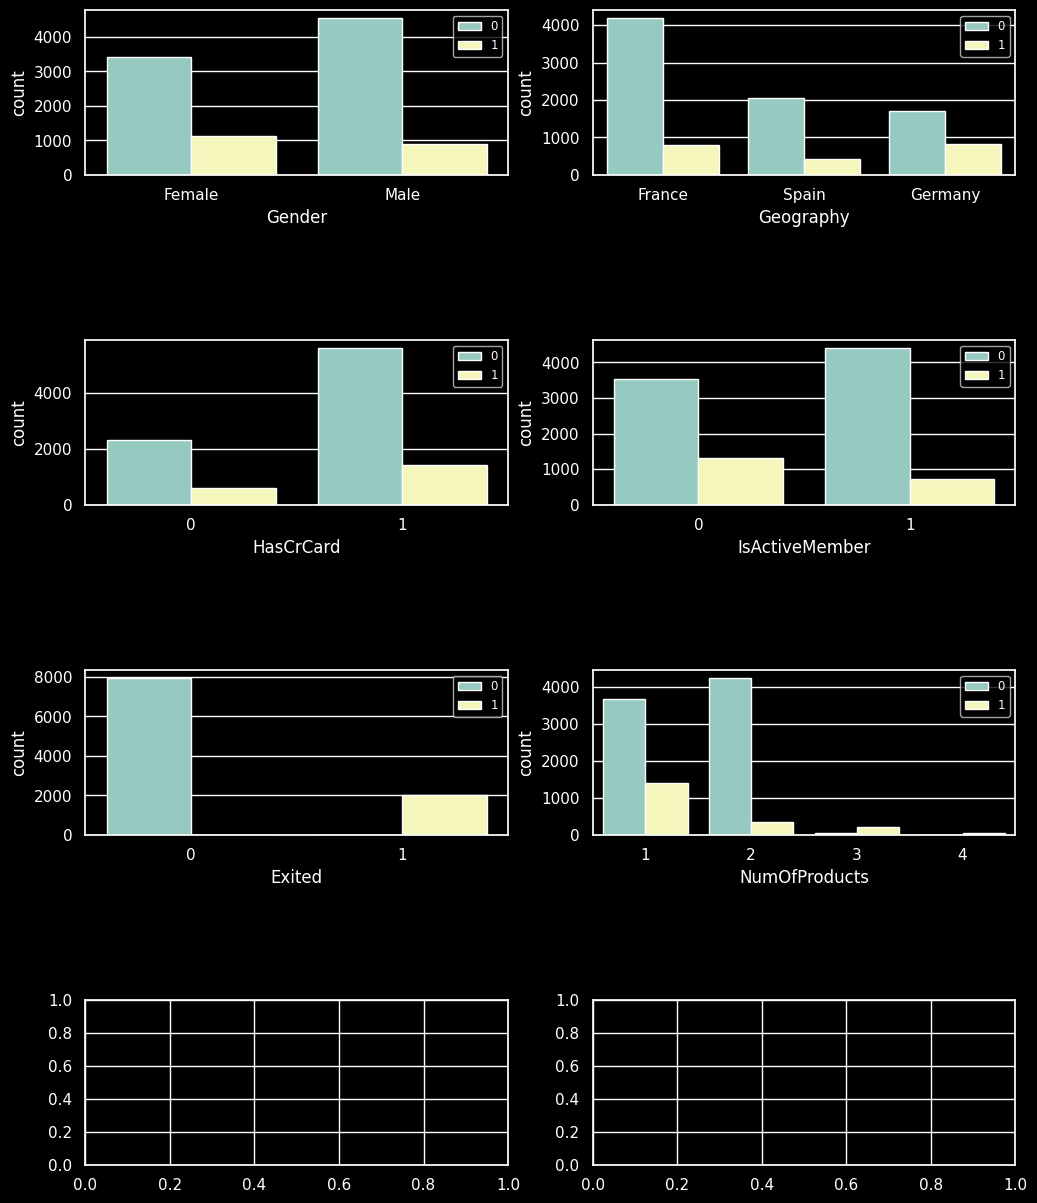

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(12,15))

for idx,cat_col in enumerate(categorical_columns):
  row,col= idx//2,  idx % 2
  sns.countplot(x=cat_col, data=df, hue='Exited', ax=axes[row,col])
  axes[row,col].legend(fontsize='small') #Set the fontsize for the legend

plt.subplots_adjust(hspace=1)
plt.show()

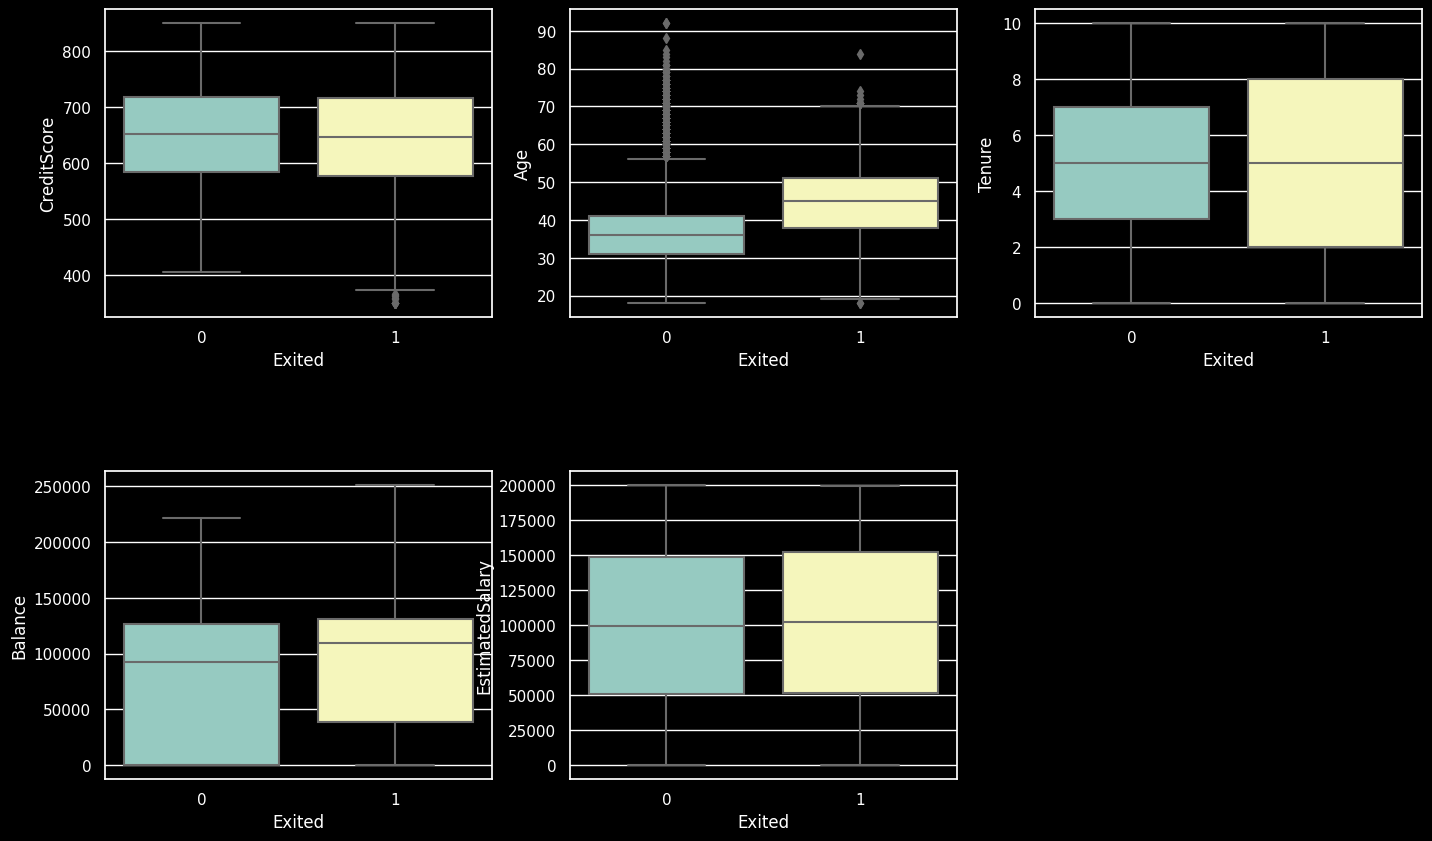

In [ ]:
# fig,axes=plt.subplots(1,5,figsize=(17,10))

# for idx,cat_col in enumerate(numerical_columns):
#     sns.boxplot(y=cat_col, data=df, x='Exited', ax=axes[idx])

# print(df[numerical_columns].describe())
# plt.subplots_adjust(hspace=1)]



# Assuming df and numerical_columns are defined

fig, axes = plt.subplots(2, 3, figsize=(17, 10))

for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=df, x='Exited', ax=axes[idx // 3, idx % 3])

# If there are more than 5 numerical columns, the remaining subplots will be empty
for idx in range(len(numerical_columns), 2 * 3):
    axes[idx // 3, idx % 3].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:




df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
df=pd.get_dummies(df,["Geography","Gender"])
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5436,831,34,2,0.00,2,0,0,165840.94,0,1,0,0,1,0
113,675,36,9,106190.55,1,0,1,22994.32,0,0,0,1,0,1
4852,687,35,3,0.00,2,1,1,176450.19,0,0,0,1,0,1
5037,606,38,7,128578.52,1,1,1,193878.51,0,0,0,1,0,1
9675,735,39,1,60374.98,1,1,0,40223.74,0,0,0,1,0,1
7779,757,46,0,0.00,2,1,0,37460.05,0,1,0,0,0,1
7838,569,32,8,145330.43,1,1,1,132038.65,0,0,1,0,1,0
8018,632,23,3,122478.51,1,1,0,147230.77,1,0,1,0,0,1
1402,757,29,8,130306.49,1,1,0,77469.38,0,1,0,0,0,1
4643,597,60,0,131778.08,1,0,0,10703.53,1,1,0,0,1,0


<Axes: >

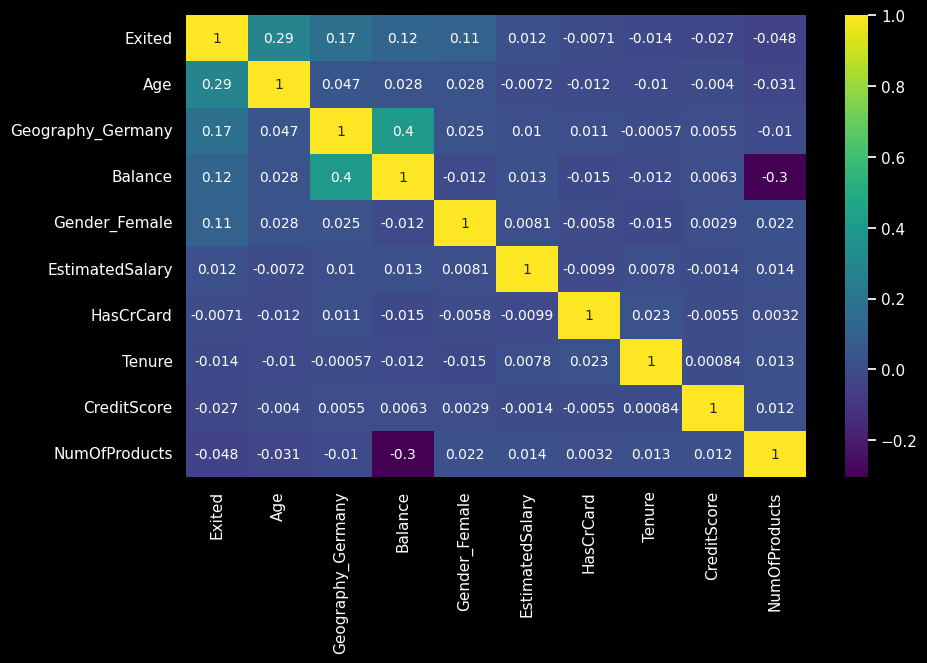

In [ ]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:






y=df[["Exited"]]
X=df.drop(["Exited"],axis=1)

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:



model_log=LogisticRegression()

In [ ]:

model_log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_log.score(X_train,y_train)

0.7938571428571428

In [ ]:
model_log.score(X_test,y_test)

0.7863333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dtc=DecisionTreeClassifier(max_depth=1, min_weight_fraction_leaf=0.1)


In [ ]:

model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, min_weight_fraction_leaf=0.1)

In [ ]:
model_dtc.score(X_train,y_train)

0.7985714285714286

In [ ]:
model_dtc.score(X_test,y_test)

0.791

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bcl =BaggingClassifier(n_estimators=15,base_estimator=model_dtc)
model_bcl.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        min_weight_fraction_leaf=0.1),
                  n_estimators=15)

In [ ]:
model_bcl.score(X_train,y_train)


0.7985714285714286

In [ ]:
model_bcl.score(X_test,y_test)

0.791

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc=SVC(kernel="linear")

In [ ]:
model_svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
model_svc.score(X_train,y_train)

0.786

In [ ]:
model_svc.score(X_test,y_test)

0.7756666666666666